## Data Generation for Convolutional-Autoencoder 

Generamos datos sintéticos de firmas polarimétricas provenientes de superficies rugosas. Las mismas se simulan bajo la aproximación SPM de segundo orden, considerando un _stack_ de dos capas rugosas como suelo a incidir. 

Luego visualizamos y exploramos la distribución de los datos, y sus características. 

### 1 - Generamos datos sin ruido 

Comenzamos importando los módulos que vamos a utilizar en el notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from deep_scattering_models.data.create_data import make_data, save_data, load_data
from deep_scattering_models.visualization.visualize import plot_polarization_signature, plot_histogram
from deep_scattering_models.features.preprocess_data import to_dB, remove_outliers

Generamos 20048 firmas polarimétricas de $45x90$. El espacio de parámetros sobre el que se samplea puede consultarse en la documentación de la función ``create_data.init_parameters_grid``.

Luego guardamos los como un solo ndarray en la carpeta data del repositorio.

In [2]:
# Generamos los datos
data = make_data()

# Guardamos los datos en data
file_name = "raw/spm_signatures_no_noise"
save_data(file_name, data)

Data saved at /home/jotavecorta/proyects/DeepScatteringModels/data/spm/raw/spm_signatures_no_noise.npy


In [3]:
data = load_data(file_name)

Veamos la pinta de alguna de las firmas polarimétricas generadas

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

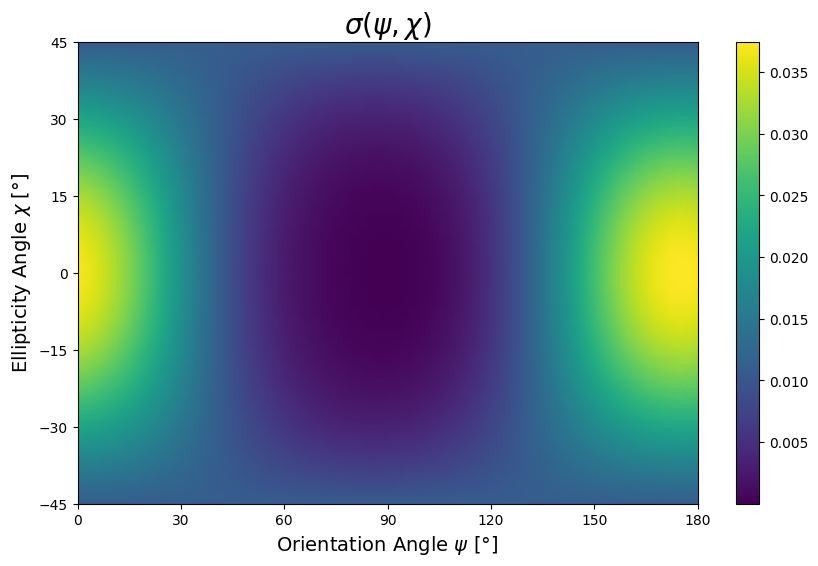

In [4]:
# Elegimos una firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(data.shape[0])
rnd_signature = data[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

### 2 - Exploración de los Datos

Veamos cual es la distribución de los datos en crudo

<AxesSubplot:title={'center':'Polarization Signature values distribution'}, xlabel='$\\sigma(\\psi, \\chi)$', ylabel='Count'>

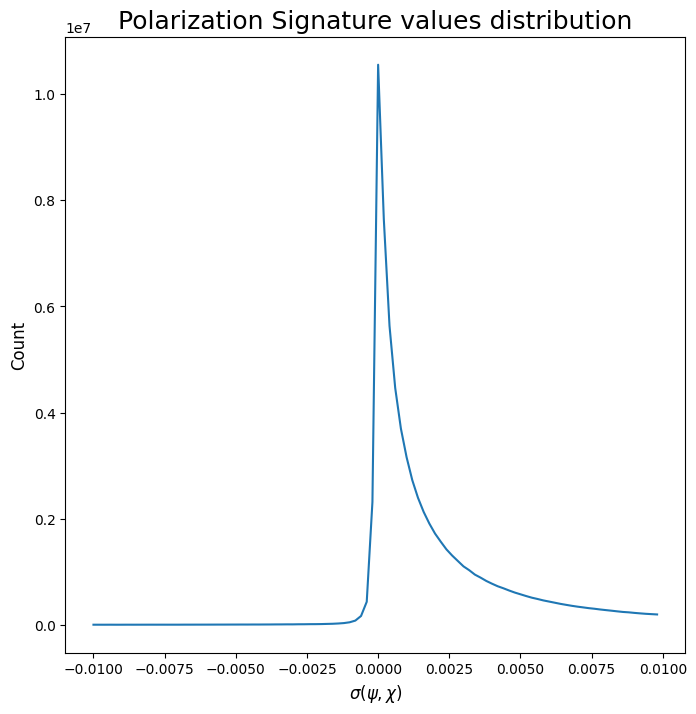

In [5]:
plot_histogram(data, n_bins=100, hist_kw={"range":(-0.01, 0.01)})

In [6]:
print(f"Valor máximo de potencia: {data.max()}")
print(f"Valor mínimo de potencia: {data.min()}")

Valor máximo de potencia: 369119927674193.2
Valor mínimo de potencia: -1570809413330378.2


In [15]:
new_data = remove_outliers(data, k=300)
print(f"Muestras luego de remover outliers: {new_data.shape[0]}")

Muestras luego de remover outliers: 6219


<AxesSubplot:title={'center':'Polarization Signature values distribution'}, xlabel='$\\sigma(\\psi, \\chi)$', ylabel='Count'>

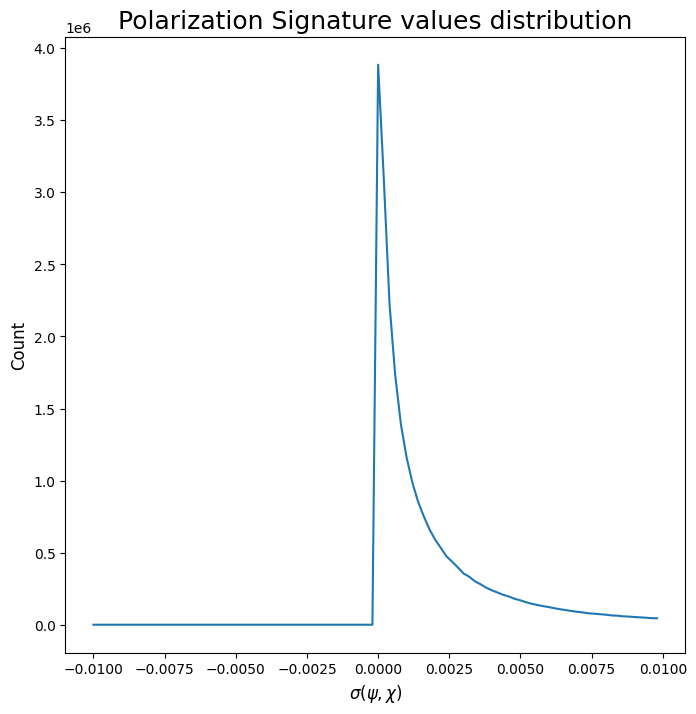

In [16]:
plot_histogram(new_data, hist_kw={"range":(-0.01, 0.01)})

In [17]:
print(f"Valor máximo de potencia: {new_data.max()}")
print(f"Valor mínimo de potencia: {new_data.min()}")

Valor máximo de potencia: 0.10270414946516299
Valor mínimo de potencia: -7.643416837876766e-10


Pasemos los datos a dB, y volvamos a ver qué forma tiene su histograma

Text(0.5, 0, '$\\sigma(\\psi, \\chi)$ [dB]')

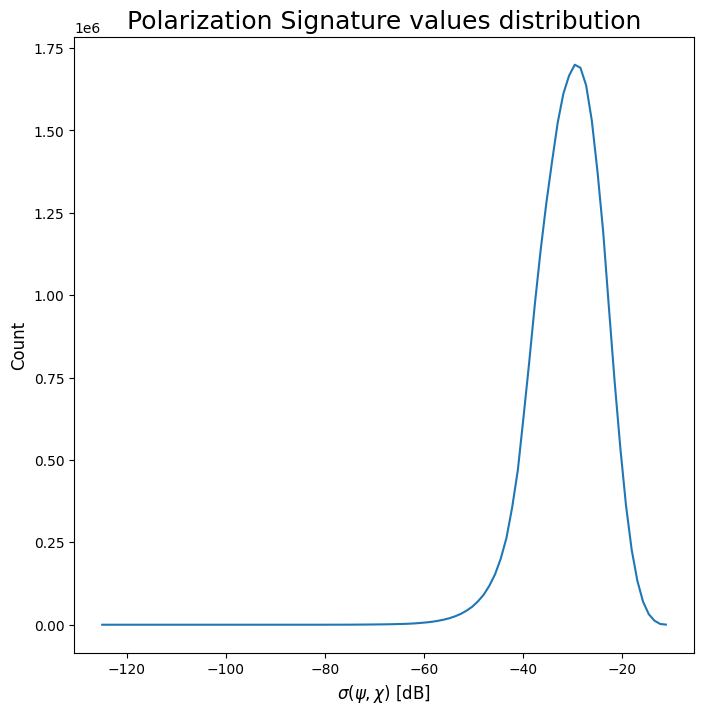

In [18]:
def to_dB(data):
    # Replace zeros to take log    
    no_zeros_data = np.where(data>0.0, data, data[data>0.0].min())
    
    return 10*np.log10(no_zeros_data)
    
data_dB = to_dB(new_data)
ax = plot_histogram(data_dB, hist_kw={"range":(-125, -10)})
ax.set_xlabel(r"$\sigma(\psi, \chi)$ [dB]") 

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

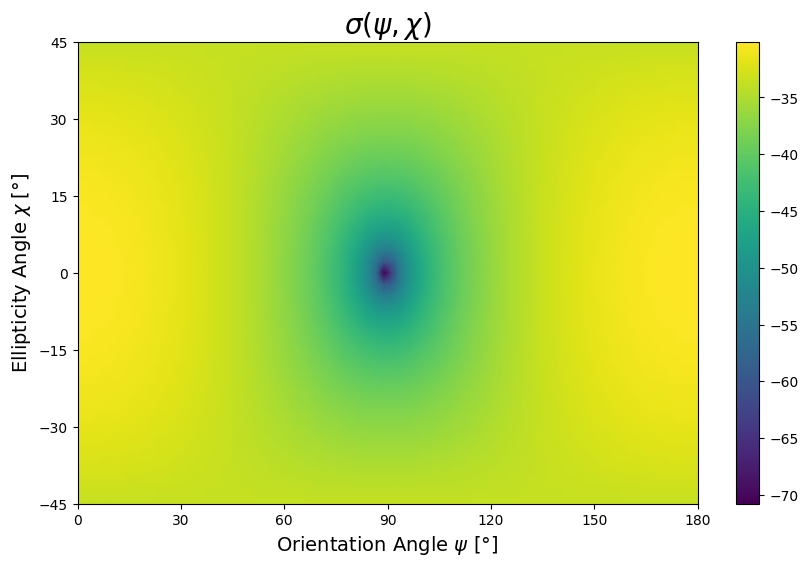

In [34]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(new_data.shape[0])
rnd_signature = data_dB[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

### 3 - Datos con ruido

Generamos nuevos datos con ruido de distribución wishart agregado [[1]](https://en.wikipedia.org/wiki/Wishart_distribution), los visualizamos y analizamos sus distribuciones en potencia y en dB.

In [4]:
# Generamos los datos
noise_data = make_data(noise=True)

# Guardamos los datos en data
file_name = "raw/spm_signatures_noise"
save_data(file_name, noise_data)

/home/jotavecorta/proyectos/tesis/src/deep_scattering_models/data/create_data.py:157: RuntimeWarning: La Matriz T no satisface las hipótesis de Cholesky para los parámetros 
 {'rms_high': 0.004, 'corr_length': 0.05647058823529411, 'epsilon': 23, 'epsilon_2': 4, 'rms_high_2': 0.011294117647058823, 'corr_length_2': 0.033882352941176475, 'distance': 0.2411764705882353, 'two_layer': True}
  warn(
/home/jotavecorta/proyectos/tesis/src/deep_scattering_models/data/create_data.py:157: RuntimeWarning: La Matriz T no satisface las hipótesis de Cholesky para los parámetros 
 {'rms_high': 0.005411764705882353, 'corr_length': 0.03952941176470588, 'epsilon': 9, 'epsilon_2': 15, 'rms_high_2': 0.010588235294117648, 'corr_length_2': 0.0451764705882353, 'distance': 0.6647058823529411, 'two_layer': True}
  warn(
/home/jotavecorta/proyectos/tesis/src/deep_scattering_models/data/create_data.py:157: RuntimeWarning: La Matriz T no satisface las hipótesis de Cholesky para los parámetros 
 {'rms_high': 0.00752

KeyboardInterrupt: 

In [5]:
noise_data = load_data("raw/spm_signatures_noise")

Nuevamente, elijamos una firma al azar y veamos qué pinta tiene.

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

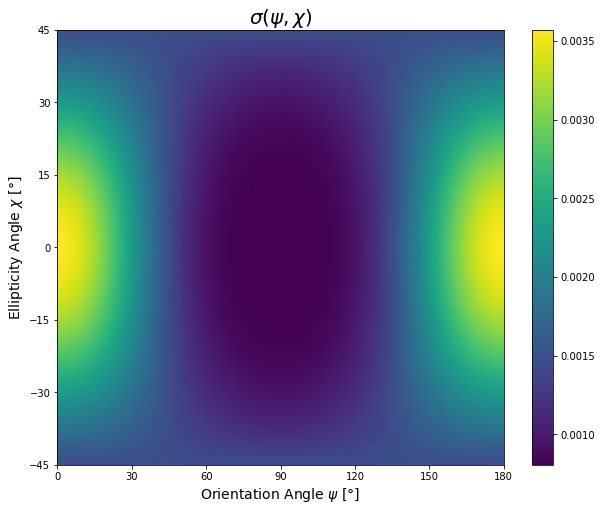

In [4]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(20048)
rnd_signature = noise_data[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

Transformemos a dB y miremos la distribución de los datos, que no debería cambiar por el agregado de ruido.

In [ ]:
noised_data_dB = to_dB(
    remove_outliers(noise_data)
    )
ax = plot_histogram(noised_data_dB)
ax.set_xlabel(r"$\sigma(\psi, \chi)$ [dB]") 